In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [38]:
data=pd.read_csv("Raw_Housing_Prices3.csv")#we using this Raw_Housing_Prices3.csv to understand feature ennrneering rather than well processed transformed housing data file

data.head(),data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

(           ID Date House was Sold  Sale Price  No of Bedrooms  \
 0  7129300520     14 October 2017    221900.0               3   
 1  6414100192    14 December 2017    538000.0               3   
 2  5631500400    15 February 2016    180000.0               2   
 3  2487200875    14 December 2017    604000.0               4   
 4  1954400510    15 February 2016    510000.0               3   
 
    No of Bathrooms  Flat Area (in Sqft)  Lot Area (in Sqft)  No of Floors  \
 0             1.00               1180.0              5650.0           1.0   
 1             2.25               2570.0              7242.0           2.0   
 2             1.00                770.0             10000.0           1.0   
 3             3.00               1960.0              5000.0           1.0   
 4             2.00               1680.0              8080.0           1.0   
 
   Waterfront View No of Times Visited  ... Overall Grade  \
 0              No                None  ...             7   
 1        

In [19]:
sum(data.isnull().sum())

0

  # Feature transformation: 1st method:
2nd method  of is feature extraction or feature extraction of feature processing

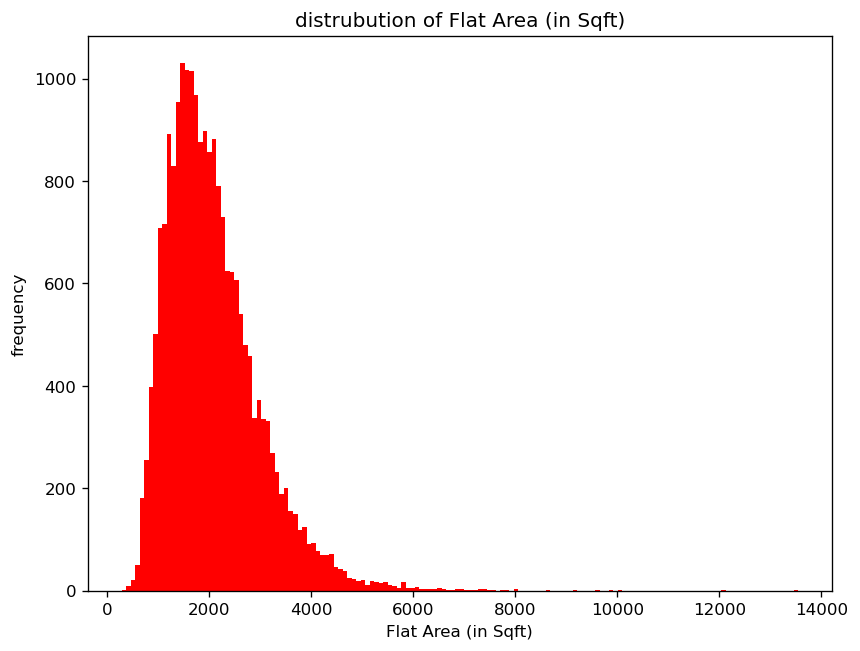

In [21]:
plt.figure(figsize=(8,6),dpi=120)
plt.hist(data["Flat Area (in Sqft)"],bins=150,color='red')
plt.xlabel("Flat Area (in Sqft)")
plt.ylabel("frequency")
plt.title("distrubution of Flat Area (in Sqft)")
plt.show()

#'''as here we can see the graph is right skewed or positive skewed so we either have to appy nroot or log transformation'''

In [29]:
def logtransform(sampledata):
    k=np.log(sampledata)
    return k

In [32]:
data["Transformed_Flat Area (in Sqft)"]=data["Flat Area (in Sqft)"].map(logtransform)

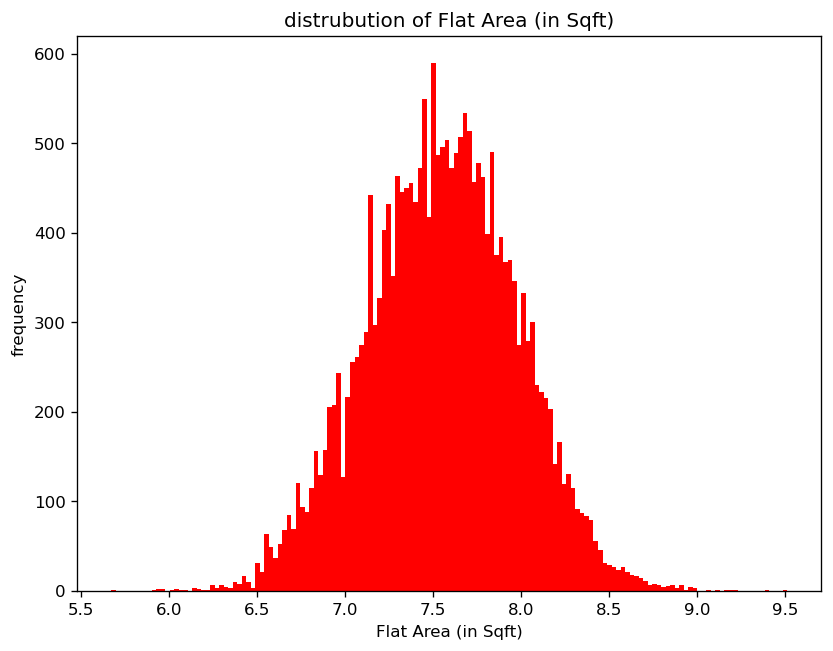

In [34]:
plt.figure(figsize=(8,6),dpi=120)
plt.hist(data["Transformed_Flat Area (in Sqft)"],bins=150,color='red')
plt.xlabel("Flat Area (in Sqft)")
plt.ylabel("frequency")
plt.title("distrubution of Flat Area (in Sqft)")
plt.show()

now graph indicates that the Transformed_Flat Area (in Sqft) is   normally distrubuted

# feature trasformation of categorical varible:
2.dumy encoding: dumy variables are created 
1.label encoding 
for ordinnal categorical varibles

In [53]:
#label encoding:
label_encoded=data["Condition of the House"]
label_encoded.value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

In [54]:
label_encoded=label_encoded.map({
    'Bad':1,
    'Okay':2,
    "Fair":3,
    'Good':4,
    "Excellent":5})
label_encoded.value_counts()

3    14028
4     5678
5     1701
2      172
1       30
Name: Condition of the House, dtype: int64

# Binning:

In [58]:
mean=[]

for i in data["Condition of the House"].unique():
    mean.append(data["Sale Price"][data["Condition of the House"]==i].mean())

Text(0, 0.5, 'mean sale price')

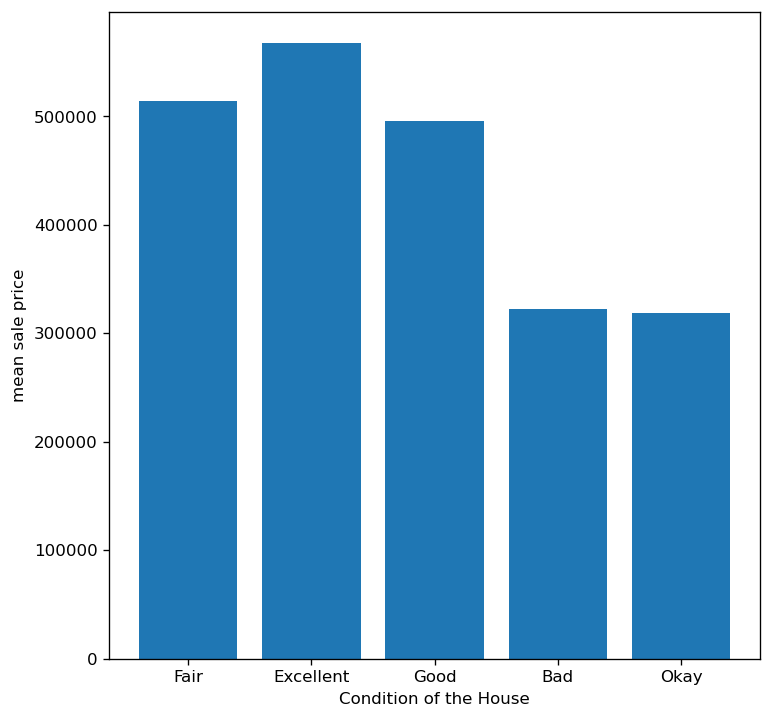

In [65]:
plt.figure(figsize=(7,7),dpi=120)
plt.bar(data["Condition of the House"].unique(),mean)
plt.xlabel("Condition of the House")
plt.ylabel("mean sale price")

In [67]:
mapping={"Excellent":"Excellent",
         'Bad':"Okay",
         'Okay':"Okay",
         'Fair':"Good",
         "Good":"Good"}

In [69]:
data["Condition of the House"]=data["Condition of the House"].map(mapping)

In [71]:
mean=[]

for i in data["Condition of the House"].unique():
    mean.append(data["Sale Price"][data["Condition of the House"]==i].mean())

Text(0, 0.5, 'mean sale price')

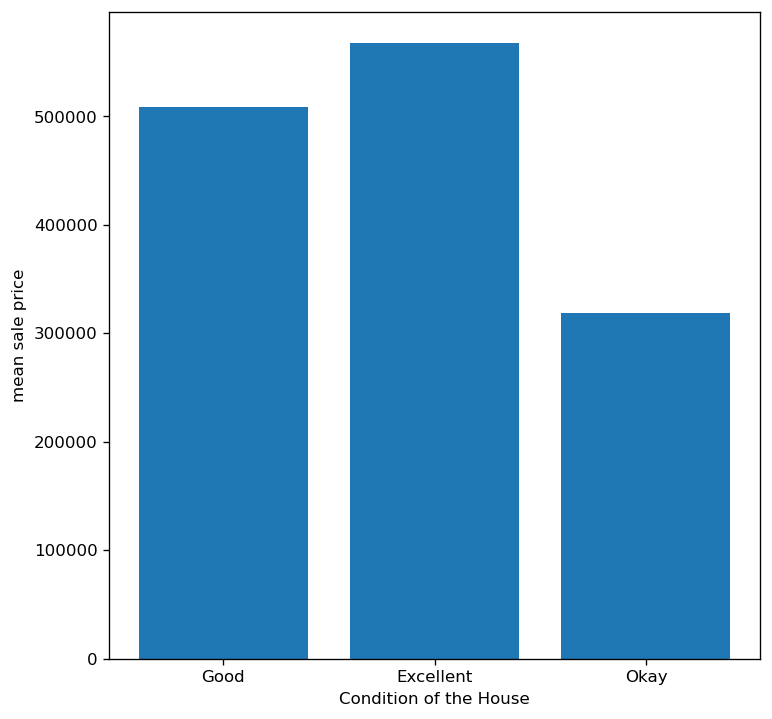

In [72]:
plt.figure(figsize=(7,7),dpi=120)
plt.bar(data["Condition of the House"].unique(),mean)
plt.xlabel("Condition of the House")
plt.ylabel("mean sale price")

In [74]:
def houseage(x):
    if x<10:
        x="new"
    elif x<50:
        x="old"
    else:
        x="very old"
    return x
#most of the times we dont prefer binning for the numeric variables as we can loss important information

In [77]:
cat_house_age=data["Age of House (in Years)"].map(houseage)
cat_house_age.unique()

array(['very old', 'old', 'new'], dtype=object)

# feature Generation:

In [103]:
time=pd.DatetimeIndex(data["Date House was Sold"])
data["year_sold"]=time.year
data["month_sold"]=time.month
data["weekday_sold"]= time.weekday
data["date_sold"]=time.day_in

AttributeError: 'DatetimeIndex' object has no attribute 'day_in'

In [104]:
data[["year_sold","month_sold","weekday_sold","date_sold"]].head()

,year_sold,month_sold,weekday_sold,date_sold
0,2017,10,5,14
1,2017,12,3,14
2,2016,2,0,15
3,2017,12,3,14
4,2016,2,0,15
